# Análise Preditiva - Custos Médicos Plano de Saúde
O objetivo desta análise é gerar alguns modelos utilizando técnicas diferentes, além de alguns pré-processamentos, para estimar o valor que será cobrado pelo plano de saúde a um determinado cliente.
Como base de estudo será utilizado a base 'insurance' disponível [aqui](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance).

In [1]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Como primeira etapa é preciso conhecer os dados:
- Descobrir tamanho dos dados;
- Identificar os tipos de dados para analisar os tratamentos necessários;

In [4]:
dataset.shape

(1338, 7)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


A primeira análise mostra que não existem dados faltantes e existem alguns items com informação categórica. Alguns parecem ter conteúdo binário, facilitando a conversão, mas outros vão precisar de uma estratégia de categorização one-hot pra facilitar o funcionamento de algoritmos de machine learning. A seguir, uma análise exploratória pra saber se os dados são representativos e válidos.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

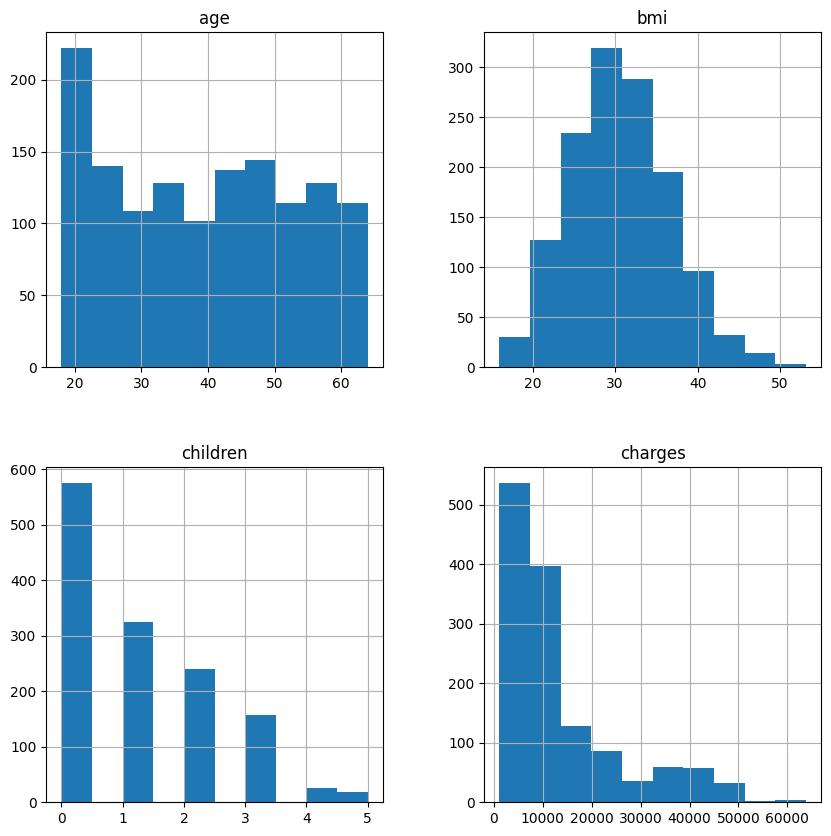

In [2]:
dataset.hist(figsize=(10,10))

Inicialmente espera-se que fumantes tenham maior probabilidade de terem mais encargos com seguro saúde. Para validar a teoria no gráfico abaixo primeiro vemos que a distribuição entre fumantes e não fumantes parecem ser equivalentes e uniformes. Existem fumantes de diversas idades, assim como não fumantes. O mesmo se observa para o gênero.

c:\Projects\ai4dev1\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


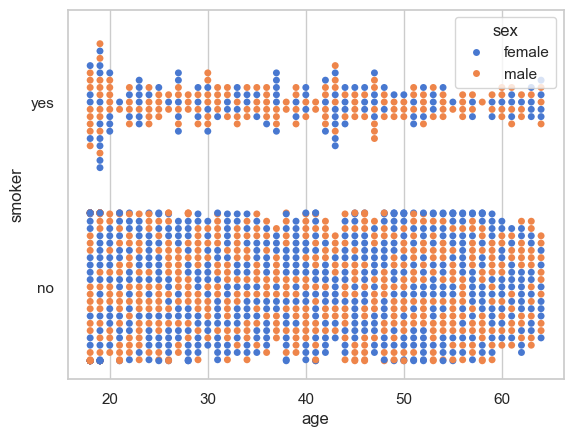

In [3]:
import seaborn as sb
sb.set_theme(style='whitegrid', palette="muted")

smoker_age_analysis = sb.swarmplot(data=dataset, x="age", y="smoker", hue="sex")

Abaixo, iremos usar o boxplot e o gráfico violino para comparar os valores de encardos entre fumantes e não fumantes.

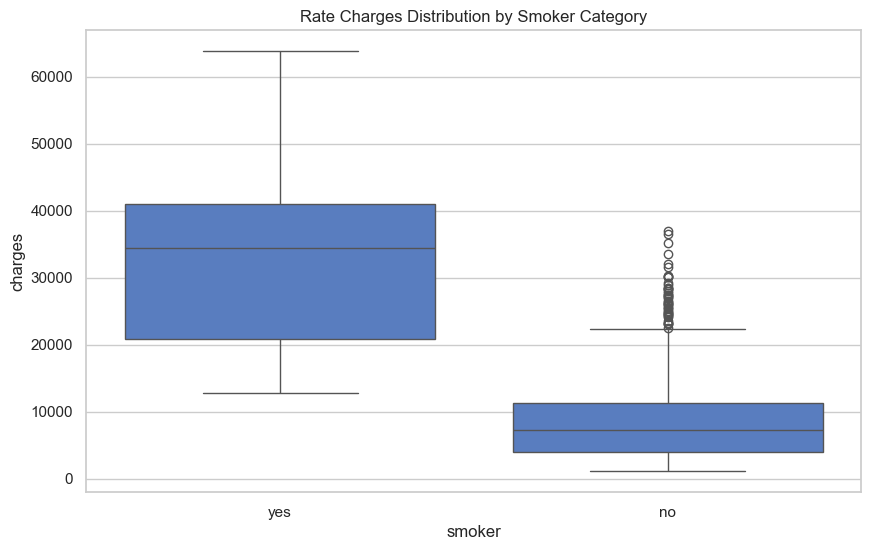

In [11]:
import matplotlib.pyplot as plt

def compare_charges_distribution(xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sb.boxplot(x=xlabel, y=ylabel, data=dataset)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

compare_charges_distribution(xlabel="smoker", ylabel="charges", title="Rate Charges Distribution by Smoker Category")

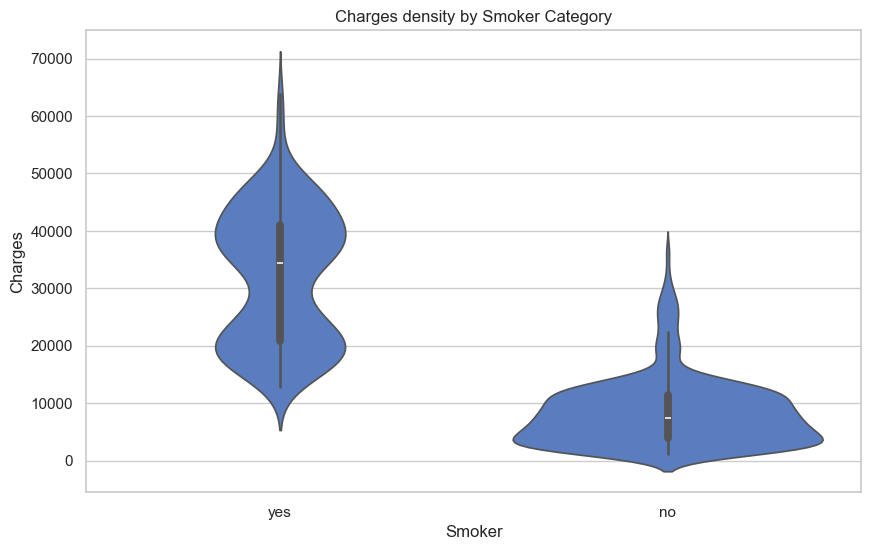

In [9]:
plt.figure(figsize=(10, 6))
sb.violinplot(x="smoker", y="charges", data=dataset)
plt.title("Charges density by Smoker Category")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

Os gráficos anteriores mostram que quase sempre fumantes possuem maiores encargos financeiros. A média deixa claro a discrepância. Inclusive os maiores valores de custo com plano de saúde são tidos como outliers.

Vamos a seguir verificar se existe alguma relação dos custos comparando com gênero, número de filhos e região.

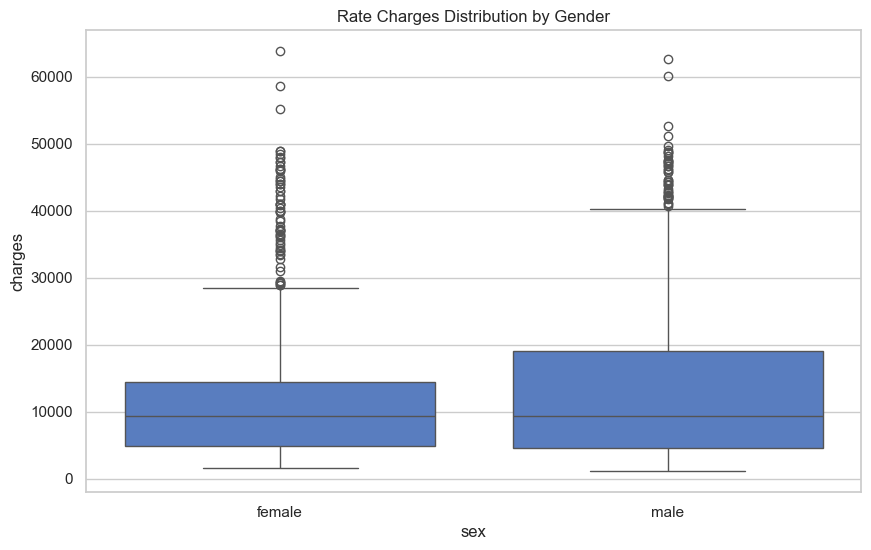

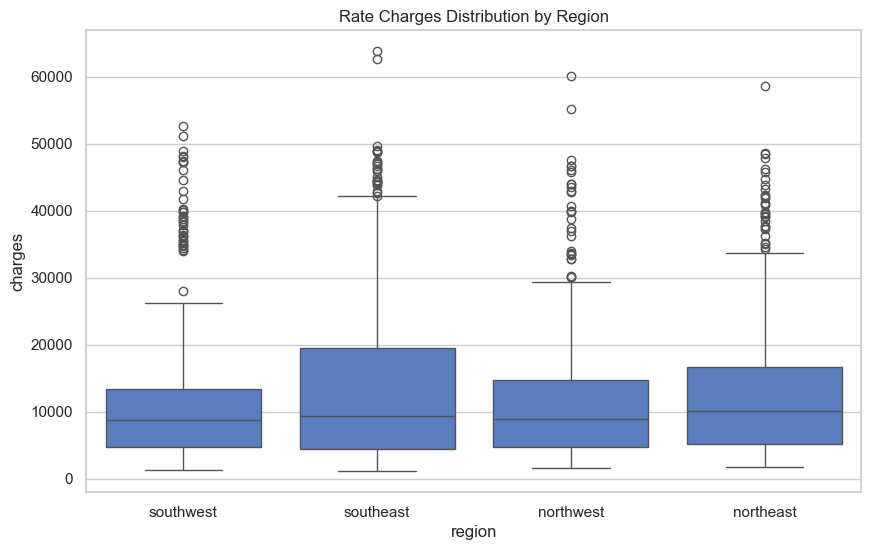

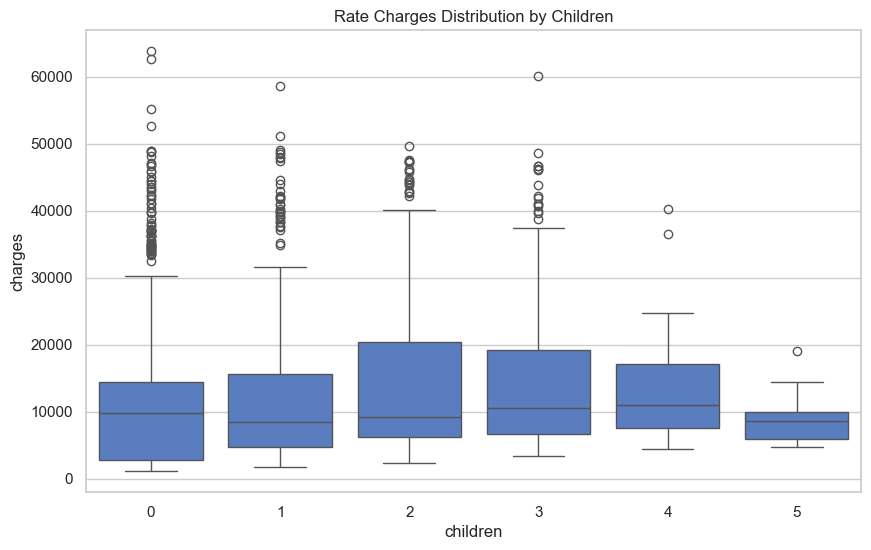

In [14]:
compare_charges_distribution(xlabel="sex", ylabel="charges", title="Rate Charges Distribution by Gender")
compare_charges_distribution(xlabel="region", ylabel="charges", title="Rate Charges Distribution by Region")
compare_charges_distribution(xlabel="children", ylabel="charges", title="Rate Charges Distribution by Children")

In [6]:
set(dataset['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

Percebi que não há dados faltantes, mas é necessário formartar os dados da região, sexo e se é fumante.

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Tentando verificar correção entre os dados com o custos do plano de saúde.

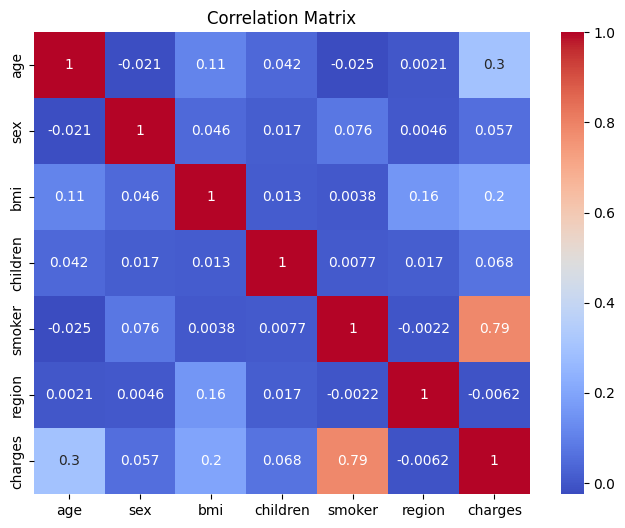

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>,
        <Axes: xlabel='region', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='bmi', ylabel='sex'>,
        <Axes: xlabel='children', ylabel='sex'>,
        <Axes: xlabel='smoker', ylabel='sex'>,
        <Axes: xlabel='region', ylabel='sex'>,
        <Axes: xlabel='charges', ylabel='sex'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='sex', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='smoker', ylabel='bmi'>,
        <Axes: xlabel='region', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age',

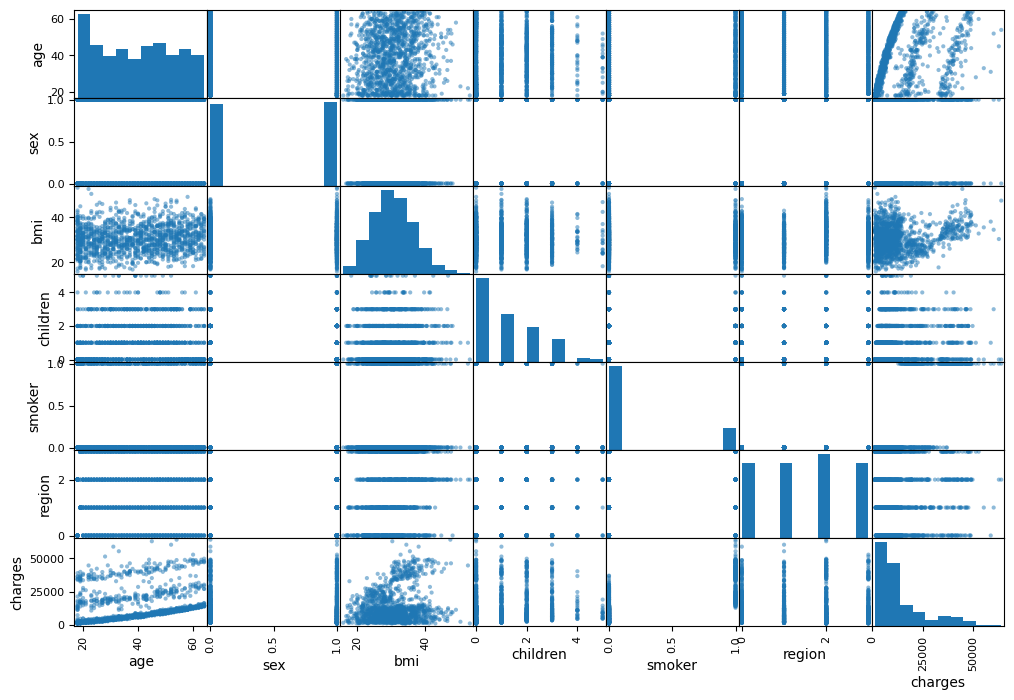

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["age", "sex", "bmi","children","smoker","region","charges"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

Após análise dos dados foi possível detectar que a idade e a condição de fumante tendem afetar o custo no seguro saúde.

In [15]:
X = dataset.drop(columns=['charges'])
y = dataset['charges']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados de treino: x:{x_train.shape} y:{y_train.shape}")
print(f"Dados de teste: x:{x_test.shape} y:{y_test.shape}")

Dados de treino: x:(1070, 6) y:(1070,)
Dados de teste: x:(268, 6) y:(268,)


In [17]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

y_pred = linear_regression.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {lin_mae}")
print(f"R2 Score: {lin_r2}")

Mean Squared Error: 33635210.431178406
Mean Absolute Error: 4186.508898366432
R2 Score: 0.7833463107364539


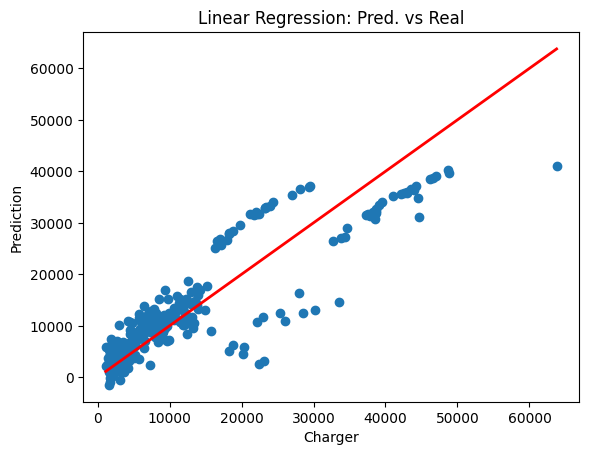

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Charger')
plt.ylabel('Prediction')
plt.title('Linear Regression: Pred. vs Real')
plt.show()

In [ ]:
O modelo gerado parece representar bem apenas uma parte da variedade dos dados. É necessário refinar o modelo tentando normalizar os dados e procurar outliers para remover.